In [70]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

In [2]:
# Import data
data = pd.read_csv('../data/data.csv')
data.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      98000 non-null  int64  
 1   f_00    98000 non-null  float64
 2   f_01    98000 non-null  float64
 3   f_02    98000 non-null  float64
 4   f_03    98000 non-null  float64
 5   f_04    98000 non-null  float64
 6   f_05    98000 non-null  float64
 7   f_06    98000 non-null  float64
 8   f_07    98000 non-null  int64  
 9   f_08    98000 non-null  int64  
 10  f_09    98000 non-null  int64  
 11  f_10    98000 non-null  int64  
 12  f_11    98000 non-null  int64  
 13  f_12    98000 non-null  int64  
 14  f_13    98000 non-null  int64  
 15  f_14    98000 non-null  float64
 16  f_15    98000 non-null  float64
 17  f_16    98000 non-null  float64
 18  f_17    98000 non-null  float64
 19  f_18    98000 non-null  float64
 20  f_19    98000 non-null  float64
 21  f_20    98000 non-null  float64
 22

In [4]:
data.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,48999.500000,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,28290.307527,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,0.000000,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,24499.750000,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,48999.500000,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,73499.250000,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,97999.000000,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


<Axes: >

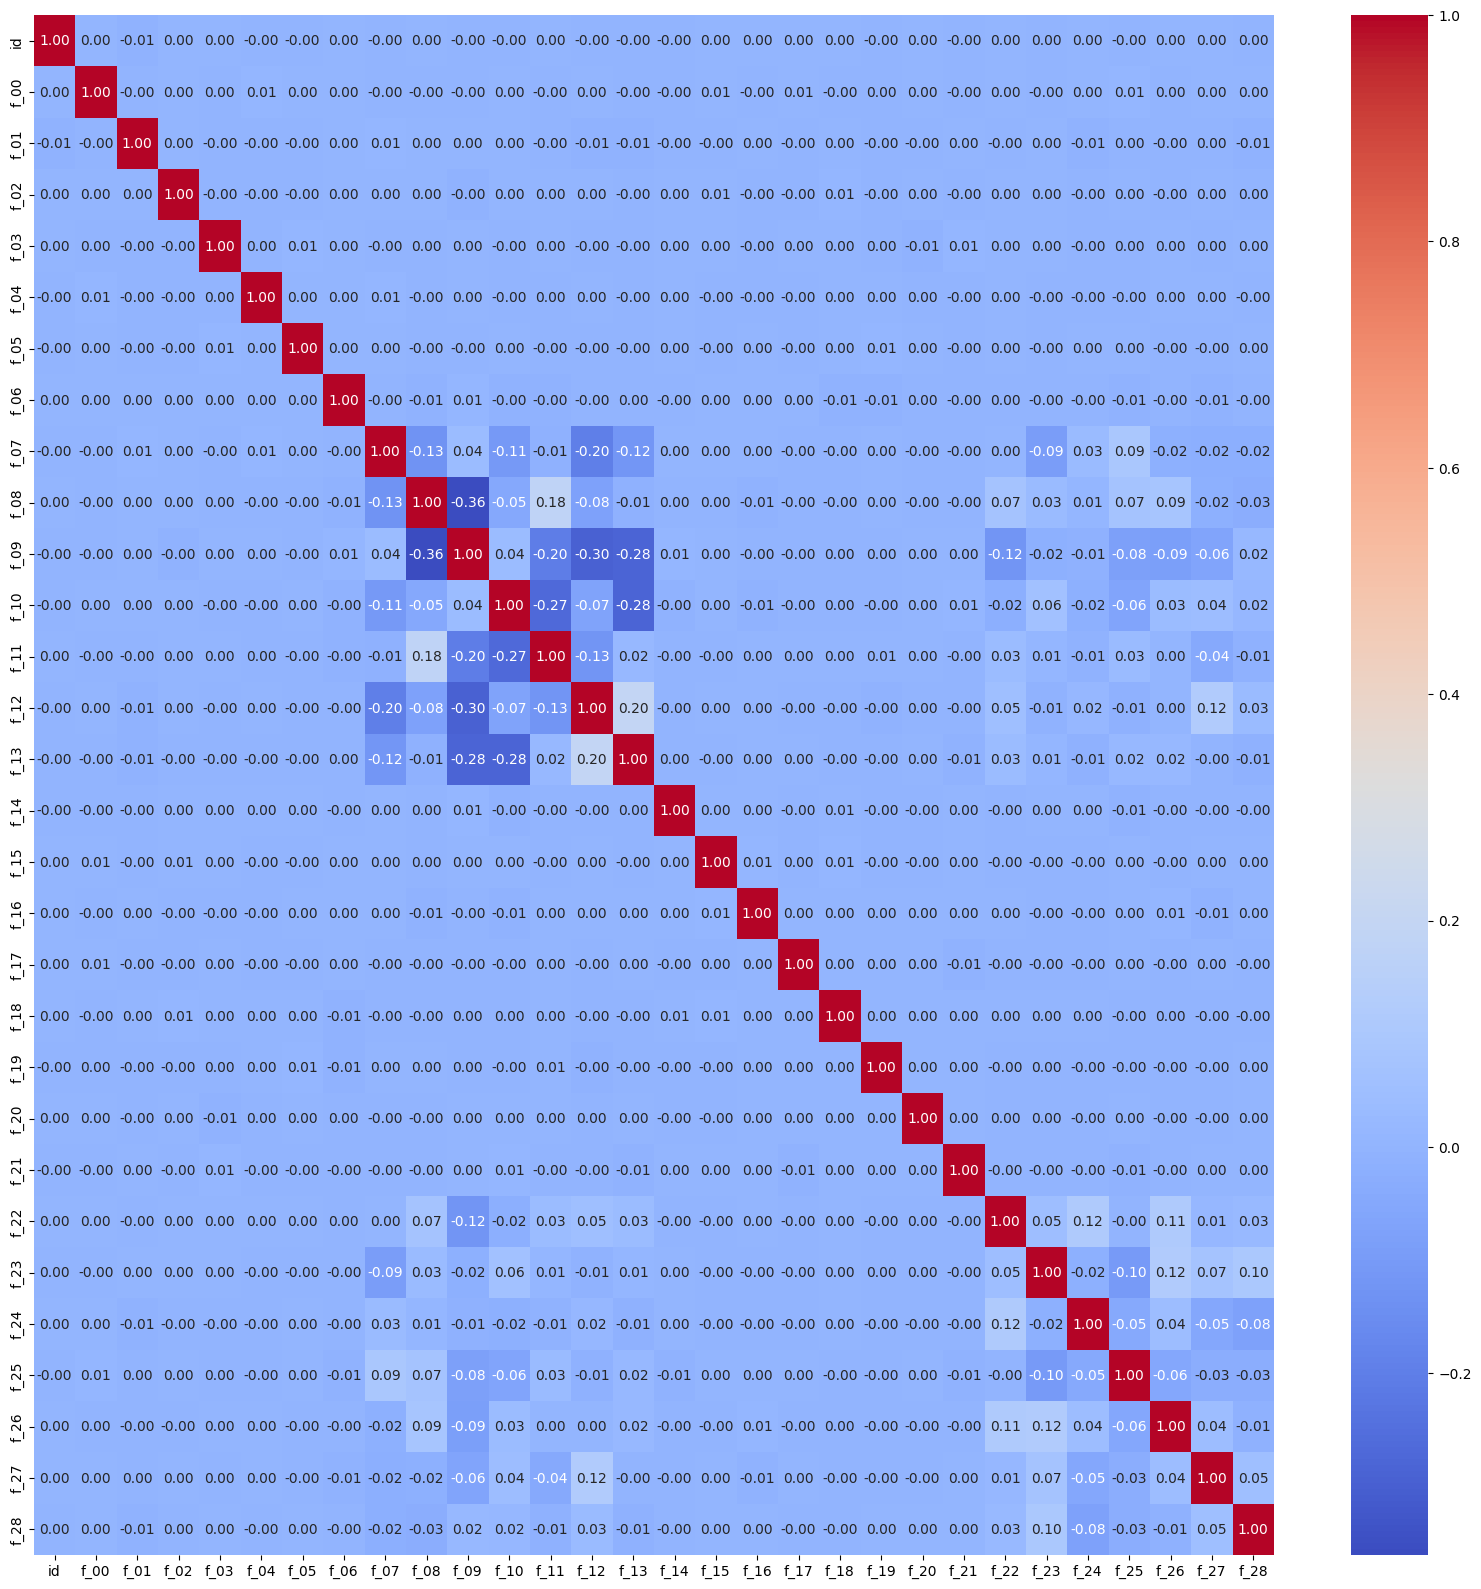

In [8]:
# data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(
    data.corr()
    , annot=True
    , cmap='coolwarm'
    , fmt = '.2f'
)

In [15]:
def plot_all_dist(df):
    plt.figure(figsize=(15,10))
    columns = data.columns[2:]
    for i in range(len(columns)):
        plt.subplot(5,6,i+1)
        p = sns.histplot(x=columns[i], data=df, stat='count', kde=True)

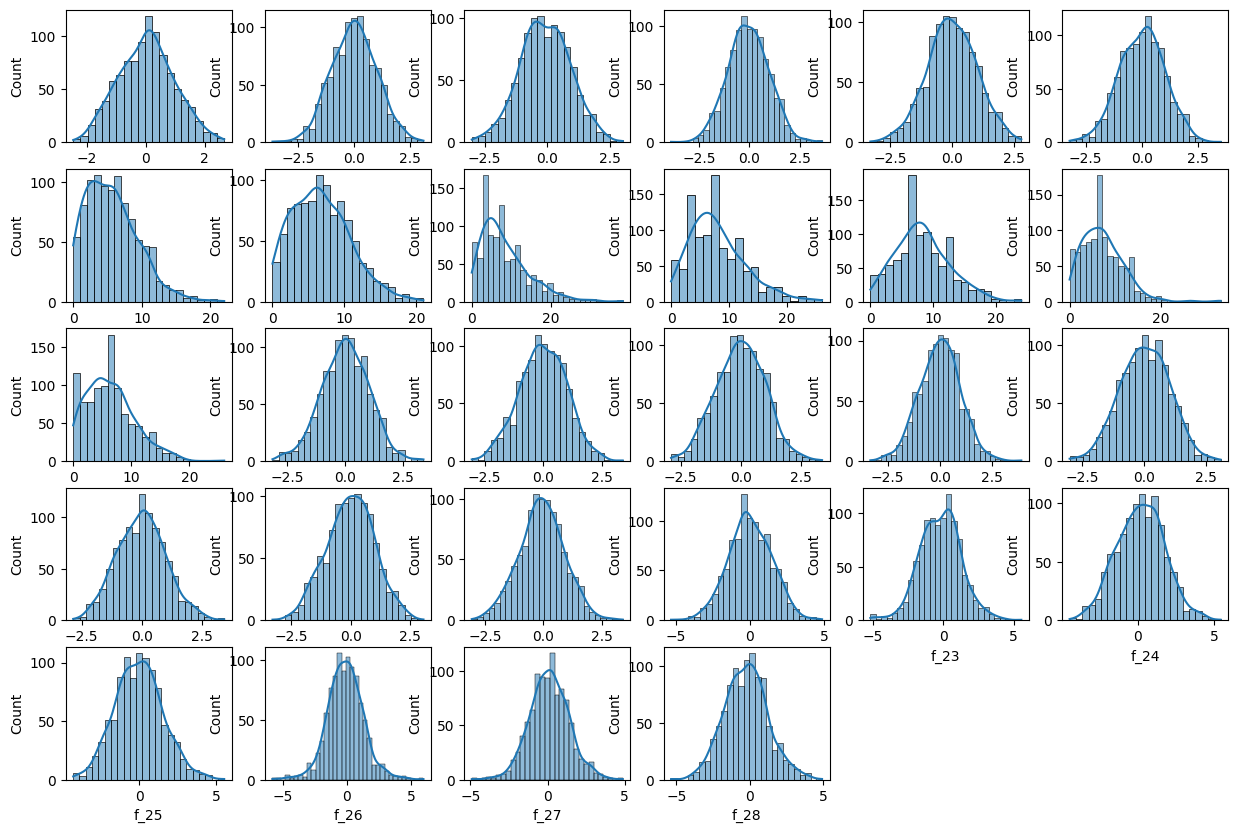

In [16]:
plot_all_dist(data.sample(1000))

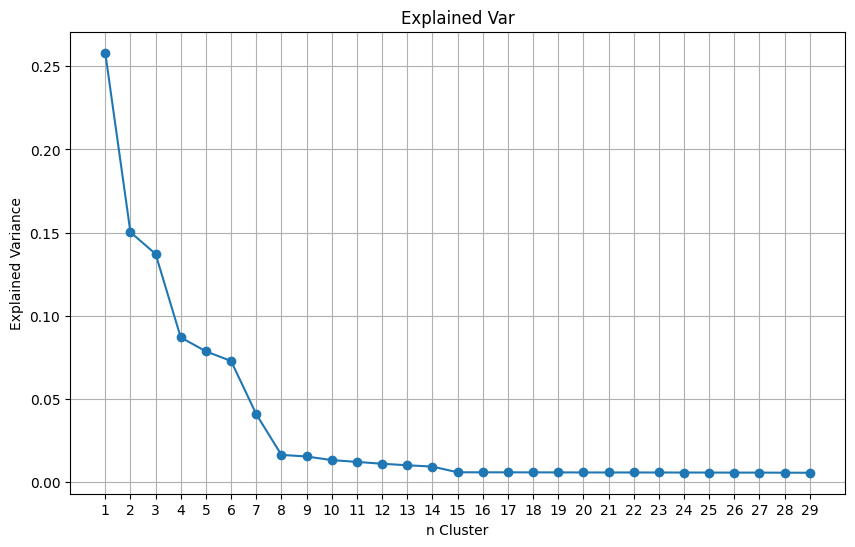

In [14]:
data_no_id = data.drop(['id'], axis=1)
pca = PCA()
pca.fit(data_no_id)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.title("Explained Var")
plt.xlabel("n Cluster")
plt.ylabel("Explained Variance")
plt.xticks(np.arange(1, len(explained_variance) + 1))  # Mengatur ticks pada sumbu x dimulai dari 1
plt.grid(True)
plt.show()

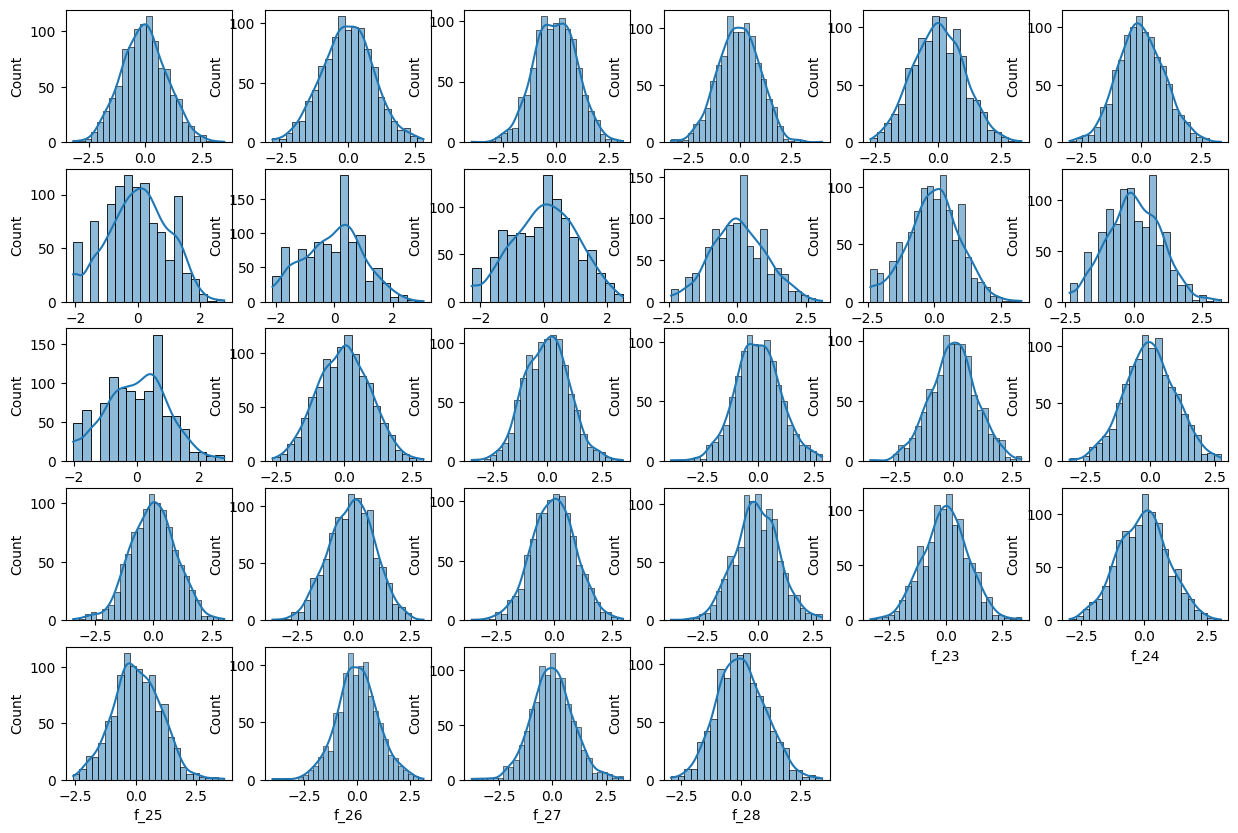

In [81]:
# scaler = StandardScaler()
# scaler = QuantileTransformer()
scaler = PowerTransformer()
# scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data_no_id), columns=data_no_id.columns)
plot_all_dist(scaled_data.sample(1000))


In [28]:
data_2 =  data[["f_07", "f_08", "f_09", "f_10", "f_11", "f_12", "f_13", "f_14"]]
data_2.head()

,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14
0,2,13,14,5,13,6,6,-0.469819
1,2,3,6,4,6,16,9,0.591035
2,5,11,5,8,9,3,11,-0.679875
3,6,2,13,8,9,6,4,-0.389456
4,8,7,5,3,1,13,11,-0.120743


In [43]:
data_3 =  data[["f_07", "f_08", "f_09", "f_10", "f_11", "f_12", "f_13", "f_14", "f_22", "f_23", "f_24", "f_25", "f_26", "f_27", "f_28"]]
data_3.head()

,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,2,13,14,5,13,6,6,-0.469819,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,2,3,6,4,6,16,9,0.591035,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,5,11,5,8,9,3,11,-0.679875,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,6,2,13,8,9,6,4,-0.389456,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,8,7,5,3,1,13,11,-0.120743,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [35]:
def kmeans_cluster(df):
    kmeans = KMeans(n_clusters=7, random_state=0, n_init="auto")
    return kmeans.fit_predict(df)

In [50]:
y_data2 = kmeans_cluster(data_2)
y_data2

array([1, 5, 1, ..., 0, 3, 5])

In [46]:
y_data3 = kmeans_cluster(data_3)
y_data3

array([6, 2, 6, ..., 0, 1, 2])

In [49]:
predict = pd.DataFrame({'Id': range(len(y_data2)), 'Predicted': y_data2}).set_index("Id")
predict.to_csv("../output/predicted_kmeans_1.csv")

In [51]:
predict = pd.DataFrame({'Id': range(len(y_data3)), 'Predicted': y_data3}).set_index("Id")
predict.to_csv("../output/predicted_kmeans_2.csv")

In [54]:
bgmm=BayesianGaussianMixture(n_components=7, covariance_type='full', random_state=0)
bgmm.fit(data_3)
predict_BGMM = bgmm.predict(data_3)
pd.DataFrame({'Id': range(len(predict_BGMM)), 'Predicted': predict_BGMM}).set_index("Id").to_csv("../output/predicted_BGMM_1.csv")


c:\Users\goldw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


In [55]:
bgmm.fit(data_2)
predict_BGMM = bgmm.predict(data_2)
pd.DataFrame({'Id': range(len(predict_BGMM)), 'Predicted': predict_BGMM}).set_index("Id").to_csv("../output/predicted_BGMM_2.csv")

c:\Users\goldw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


In [62]:
bgmm=BayesianGaussianMixture(n_components=7, covariance_type='full', init_params="random_from_data", random_state=0)
bgmm.fit(data_3)
predict_BGMM = bgmm.predict(data_3)
pd.DataFrame({'Id': range(len(predict_BGMM)), 'Predicted': predict_BGMM}).set_index("Id").to_csv("../output/predicted_BGMM_6.csv")

c:\Users\goldw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


In [68]:
dbscan = DBSCAN(eps=0.5, min_samples=100)
predict_dbscan = dbscan.fit_predict(data_3)
pd.DataFrame({'Id': range(len(predict_dbscan)), 'Predicted': predict_dbscan}).set_index("Id").to_csv("../output/predicted_DBSCAN.csv")

In [79]:
data_4 = scaled_data[['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28']]
data_4.head()

,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0.06250,0.433333,0.318182,0.138889,0.464286,0.157895,0.200000,0.440618,0.431881,0.656229,0.450930,0.546854,0.603894,0.605064,0.557570
1,0.06250,0.100000,0.136364,0.111111,0.214286,0.421053,0.300000,0.560252,0.450616,0.608434,0.623499,0.446892,0.453613,0.543135,0.306763
2,0.15625,0.366667,0.113636,0.222222,0.321429,0.078947,0.366667,0.416930,0.757268,0.570082,0.367093,0.397413,0.605750,0.428078,0.238558
3,0.18750,0.066667,0.295455,0.222222,0.321429,0.157895,0.133333,0.449681,0.590711,0.433370,0.602681,0.331975,0.469007,0.500973,0.516282
4,0.25000,0.233333,0.113636,0.083333,0.035714,0.342105,0.366667,0.479984,0.534534,0.405619,0.604864,0.392484,0.624310,0.476586,0.356527


In [77]:
bgmm=BayesianGaussianMixture(n_components=7, covariance_type='full', init_params="random", random_state=0)
bgmm.fit(data_4)
predict_BGMM = bgmm.predict(data_4)
pd.DataFrame({'Id': range(len(predict_BGMM)), 'Predicted': predict_BGMM}).set_index("Id").to_csv("../output/predicted_BGMM_8.csv")

In [80]:
bgmm=BayesianGaussianMixture(n_components=7, covariance_type='full', init_params="random", random_state=0)
bgmm.fit(data_4)
predict_BGMM = bgmm.predict(data_4)
pd.DataFrame({'Id': range(len(predict_BGMM)), 'Predicted': predict_BGMM}).set_index("Id").to_csv("../output/predicted_BGMM_9.csv")

c:\Users\goldw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


In [85]:
scaler = PowerTransformer()
data_5 = data_no_id.copy()
df_temp = data_no_id[["f_07", "f_08", "f_09", "f_10", "f_11", "f_12", "f_13", "f_14"]]
data_5[['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14']] = scaler.fit_transform(df_temp)

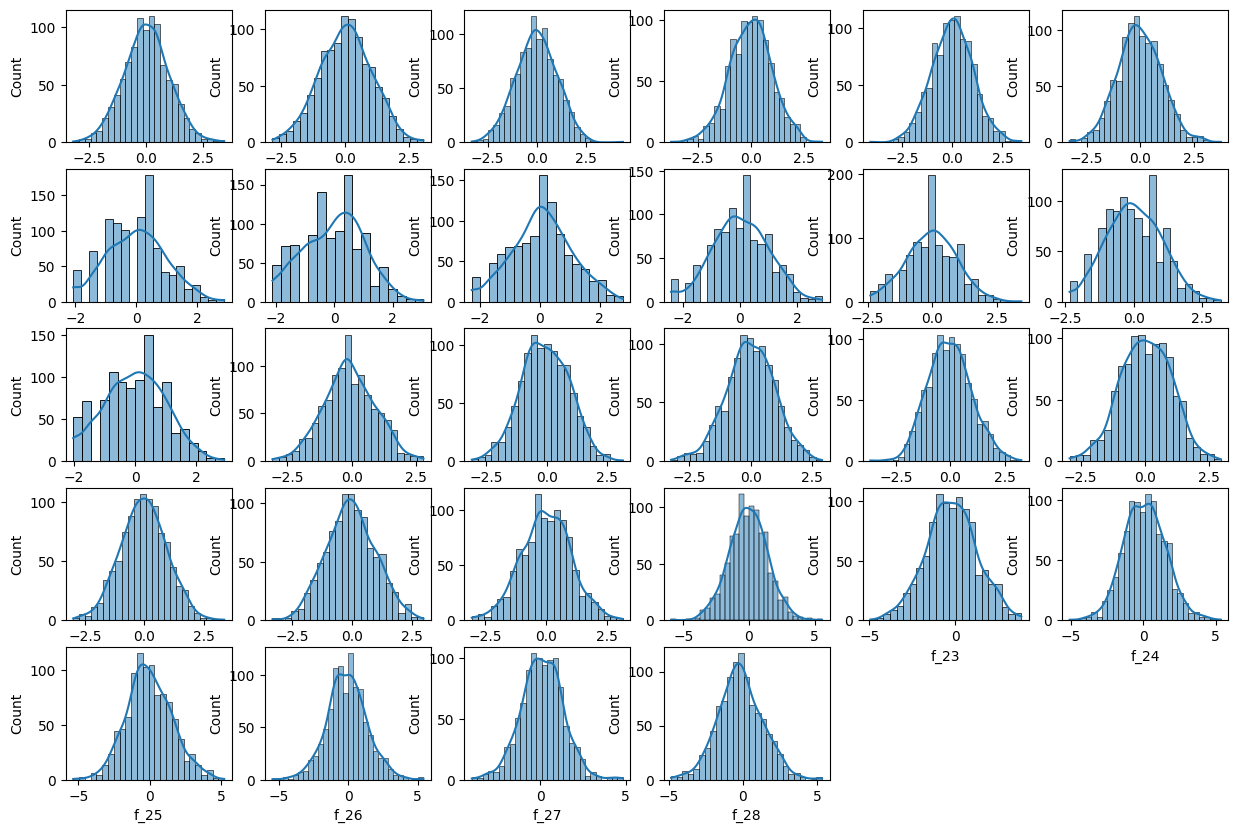

In [84]:
plot_all_dist(data_5.sample(1000))

In [ ]:
bgmm=BayesianGaussianMixture(n_components=7, covariance_type='full', init_params="random", random_state=0)
bgmm.fit(data_5)
predict_BGMM = bgmm.predict(data_5)
pd.DataFrame({'Id': range(len(predict_BGMM)), 'Predicted': predict_BGMM}).set_index("Id").to_csv("../output/predicted_BGMM_10.csv")